# Relative Strength Index (RSI)

The concept is the same as the Bollinger Bands; if we hit a certain threshold, we should buy or sell.
<br>
The RSI, not to be confused with Relative Strength, is dependent on a Simple (or Exponential) Moving Average is typically conducted on a 14-day windown (or span).
<br>
To assess the RSI, we put the strength on a scale of 0-100 with highs and lows marked as 70 and 30, respectively. This however is up to us, and in the example below we shall use a 80-20 to show how we can change it.

The RSI is calculated using Ups and Downs. 
<br>
For **Upward** changes we have:

$\bullet$ $ U = close_{now} - close_{previous} $
<br>
$\bullet$ $ D = 0 $

For **Downward** changes we have:

$\bullet$ $ U = 0 $
<br>
$\bullet$ $ D = close_{previous} - close_{now} $

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns; sns.set_style('darkgrid')

import pandas_datareader as pdr

In [24]:
ticker = input('Please input the ticker you want to look at: ').upper()
# upper() function to capitalise

start = '2017-01-01'
end = '2021-01-01'

data = pdr.DataReader(ticker, 'yahoo', start, end)['Adj Close']
volume = pdr.DataReader(ticker, 'yahoo', start, end)['Volume']

Please input the ticker you want to look at:  jnj


In [25]:
delta = data.diff(1)
# This simply takes the difference between the current and the previous data
    # i - (i-1)

delta = delta.dropna()

up = delta.copy()
down = delta.copy()
# We create two variables as exact copies of the differenced data - delta

up[up < 0] = 0
down[down > 0] = 0
# Now we apply the upward and downward conditions.
    # For all up values that are less than 0, set them equal to 0.
    # For all down values that are more than 0, set them equal to 0.

avg_gain = up.rolling(window=14).mean()
avg_loss = abs(down.rolling(window=14).mean())
# Since we want to see the losses, we set the value to absolute using the abs() function.

rsi = 100.0 - (100.0 / (1.0 + avg_gain / avg_loss))
# RSI forumula on a 0-100 scale.
    
rsi_dataframe = pd.DataFrame({'RSI': rsi})

rsi_dataframe['RSI 20%'] = rsi_dataframe[rsi_dataframe['RSI'] < 20]['RSI']
rsi_dataframe['RSI 80%'] = rsi_dataframe[rsi_dataframe['RSI'] > 80]['RSI']
# The above two lines are longer because the rsi_dataframe['RSI'] < 20 and rsi_dataframe['RSI'] > 80
# are slices of where we want the data.
    # What we mean by this is that when the argument rsi_dataframe['RSI'] > 80 holds true, then the 
    # the values associated with the RSI data we calculated will be returned, else NaN.
    # It is better visualised when we can see the data itself.
    
    # If we just had rsi_dataframe['RSI'] > 80 instead of rsi_dataframe[rsi_dataframe['RSI'] > 80]['RSI']
    # we would get a list of Trues and Falses.
    # You can try this out to understand what's going on.
    
rsi_dataframe

,RSI,RSI 20%,RSI 80%
Date,,,
2017-01-04,NaN,NaN,NaN
2017-01-05,NaN,NaN,NaN
2017-01-06,NaN,NaN,NaN
2017-01-09,NaN,NaN,NaN
2017-01-10,NaN,NaN,NaN
...,...,...,...
2020-12-24,55.188602,NaN,NaN
2020-12-28,60.232799,NaN,NaN
2020-12-29,56.819388,NaN,NaN


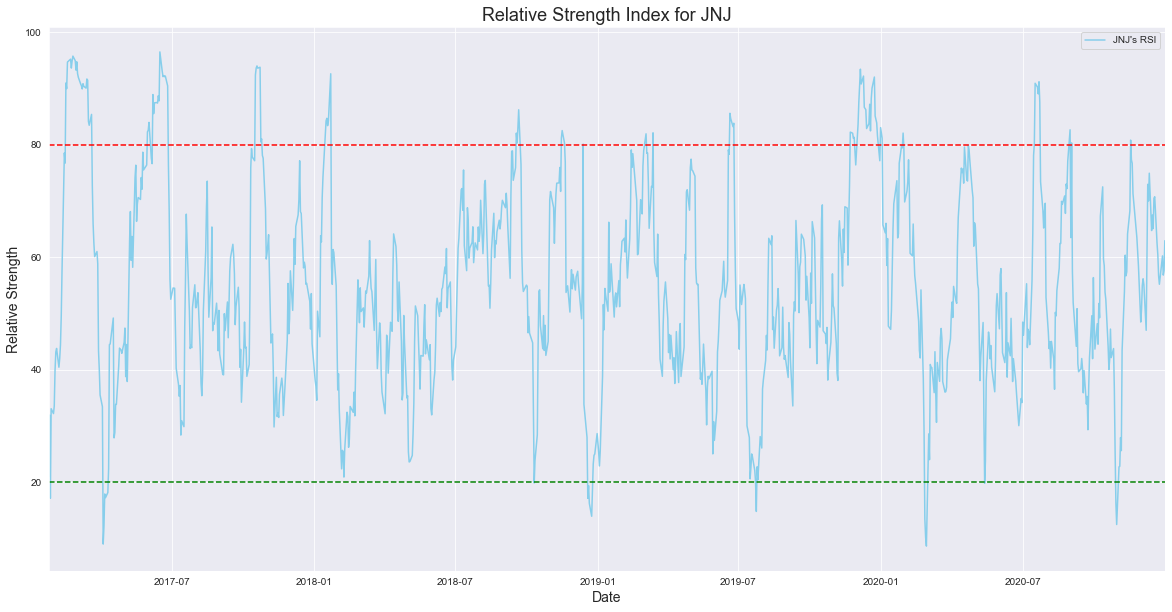

In [26]:
plt.figure(figsize=(20,10))
plt.plot(rsi, label=f'{ticker}\'s RSI', color='skyblue')
# See here how we have used a forward slash \
# This is used if we want to have the string ' inside a string that we quoted using ''
# The simpler way around this would be to use "" instead.

plt.axhline(y=80, ls='--', lw='1.5', c='red')
plt.axhline(y=20, ls='--', lw='1.5', c='green')
# ls - linestyle
# lw - linewidth
# c - colour

plt.legend()
plt.margins(x=0)
plt.title(f'Relative Strength Index for {ticker}', fontsize=18)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Relative Strength', fontsize=14)
plt.show()

Now that we have the relative strength, let's see this in action with buy/sell signals, as well as the actual share price of the asset.

In [27]:
def rsi_signal(data, rsi_data, floor=20, ceiling=80):
    data = data[1:]
    signal_buy_price = []
    signal_sell_price = []
    rsi_signal_buy_price = []
    rsi_signal_sell_price = []
    
    flag = -1
    
    # This for loop is for the share price data and RSI data.
    for i in range(0, len(rsi_data)):
        if rsi_data[i] >= ceiling and flag != 1:
            signal_buy_price.append(np.nan)
            signal_sell_price.append(data[i])
            rsi_signal_buy_price.append(np.nan)
            rsi_signal_sell_price.append(rsi_data[i])
            flag = 1
            
        elif rsi_data[i] <= floor and flag != 0:
            signal_buy_price.append(data[i])
            signal_sell_price.append(np.nan)
            rsi_signal_buy_price.append(rsi_data[i])
            rsi_signal_sell_price.append(np.nan)
            flag = 0
            
        else:
            signal_buy_price.append(np.nan)
            signal_sell_price.append(np.nan)
            rsi_signal_sell_price.append(np.nan)
            rsi_signal_buy_price.append(np.nan)
            
    return signal_buy_price, signal_sell_price, rsi_signal_buy_price, rsi_signal_sell_price

In [28]:
# def rsi_signal(data, rsi_data, floor=20, ceiling=80):
#     data = data[1:]
#     rsi_signal_buy_price = []
#     rsi_signal_sell_price = []

#     flag = -1
    
#     # This for loop is for the RSI data and plot
#     for i in range(0, len(data)):
#         if rsi_data[i] >= ceiling and flag != -1:
#             rsi_signal_buy_price.append(np.nan)
#             rsi_signal_sell_price.append(rsi_data[i])
#             flag = 1
            
#         elif rsi_data[i] <= floor and flag != 0:
#             rsi_signal_buy_price.append(rsi_data[i])
#             rsi_signal_sell_price.append(np.nan)
#             flag = 0
            
#         else:
#             rsi_signal_sell_price.append(np.nan)
#             rsi_signal_buy_price.append(np.nan)
            
#     return rsi_signal_buy_price, rsi_signal_sell_price

In [29]:
buy, sell, rsi_buy, rsi_sell = rsi_signal(data, rsi_dataframe['RSI'])
rsi_dataframe[f'{ticker} Buy Price'] = buy
rsi_dataframe[f'{ticker} Sell Price'] = sell

# rsi_buy, rsi_sell = rsi_signal(data, rsi_dataframe['RSI'])
rsi_dataframe[f'{ticker} RSI Buy Price'] = rsi_buy
rsi_dataframe[f'{ticker} RSI Sell Price'] = rsi_sell
rsi_dataframe[f'{ticker} Share Price'] = data[1:]
# We start after the first date since when we calculate the RSI the first date is used to calulate
# time i and we have no data for i-1.

rsi_dataframe

,RSI,RSI 20%,RSI 80%,JNJ Buy Price,JNJ Sell Price,JNJ RSI Buy Price,JNJ RSI Sell Price,JNJ Share Price
Date,,,,,,,,
2017-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,101.356453
2017-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102.416901
2017-01-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,101.926125
2017-01-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,101.908592
2017-01-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,101.803436
...,...,...,...,...,...,...,...,...
2020-12-24,55.188602,NaN,NaN,NaN,NaN,NaN,NaN,148.721939
2020-12-28,60.232799,NaN,NaN,NaN,NaN,NaN,NaN,149.424255
2020-12-29,56.819388,NaN,NaN,NaN,NaN,NaN,NaN,150.350891


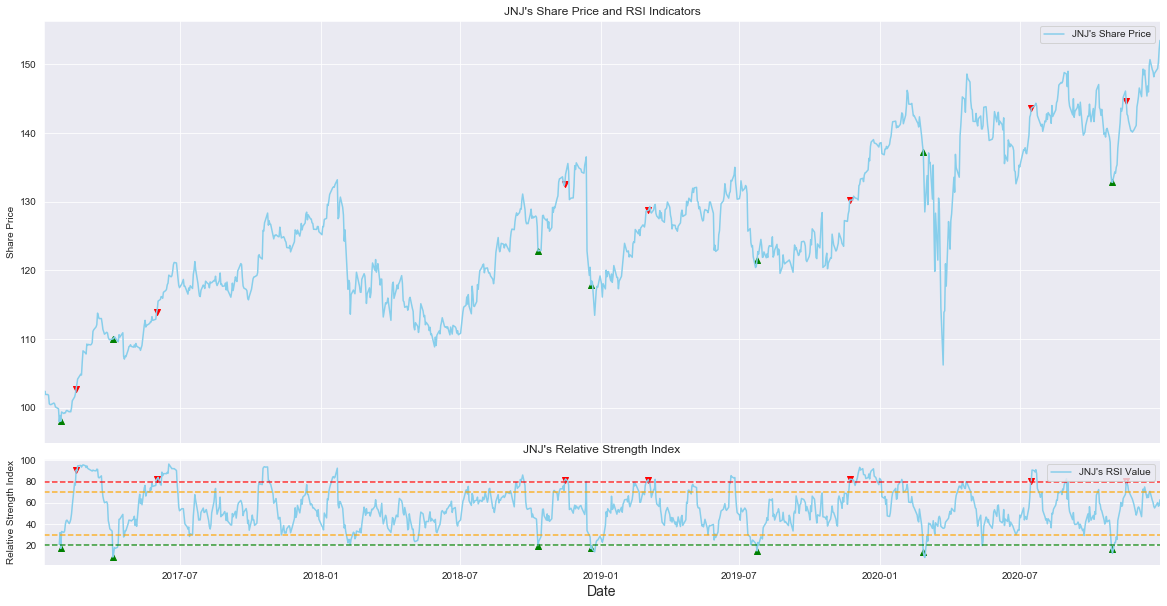

In [30]:
ceiling = 80
floor = 20

fig, ax = plt.subplots(2, figsize=(20,10), sharex='col', gridspec_kw={'height_ratios':[2, 0.5]})
fig.subplots_adjust(hspace=0.06, wspace=0)
ax[0].plot(rsi_dataframe[f'{ticker} Share Price'], label=f"{ticker}'s Share Price", c='skyblue')
ax[0].scatter(rsi_dataframe.index, rsi_dataframe[f'{ticker} Buy Price'], marker='^', c='g')
ax[0].scatter(rsi_dataframe.index, rsi_dataframe[f'{ticker} Sell Price'], marker='v', c='r')
ax[0].set_title(f'{ticker}\'s Share Price and RSI Indicators')
ax[0].set_ylabel('Share Price')
ax[0].legend()

ax[1].plot(rsi_dataframe['RSI'], label=f"{ticker}'s RSI Value", color='skyblue')
ax[1].axhline(y=ceiling, ls='--', c='r', alpha=0.8)
ax[1].axhline(y=floor, ls='--', c='g', alpha=0.8)
ax[1].axhline(y=ceiling - 10, ls='--', c='orange', alpha=0.8)
ax[1].axhline(y=floor + 10, ls='--', c='orange', alpha=0.8)

ax[1].scatter(rsi_dataframe.index, rsi_dataframe[f'{ticker} RSI Buy Price'], marker='^', c='g')
ax[1].scatter(rsi_dataframe.index, rsi_dataframe[f'{ticker} RSI Sell Price'], marker='v', c='r')
ax[1].set_title(f'{ticker}\'s Relative Strength Index')
ax[1].set_ylabel('Relative Strength Index')
ax[1].set_xlabel('Date', fontsize=14)
ax[1].legend()

plt.margins(x=0)
plt.show();

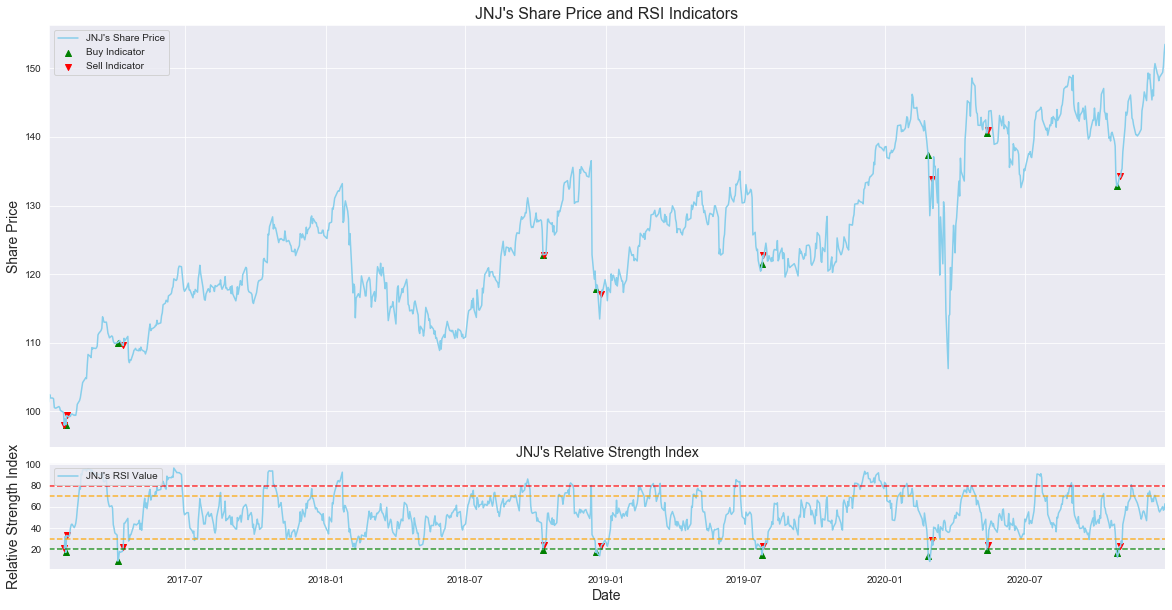

In [34]:
# In summary

ceiling = 80
floor = 20
interval = 14

delta = data.diff(1)
delta = delta.dropna()
up = delta.copy()
down = delta.copy()
up[up < 0] = 0
down[down > 0] = 0
avg_gain = up.rolling(window=interval).mean()
avg_loss = abs(down.rolling(window=interval).mean())
rsi = 100.0 - (100.0 / (1.0 + avg_gain / avg_loss))
rsi_dataframe = pd.DataFrame({'RSI': rsi})
rsi_dataframe[f'RSI {floor}%'] = rsi_dataframe[rsi_dataframe['RSI'] < floor]['RSI']
rsi_dataframe[f'RSI {ceiling}%'] = rsi_dataframe[rsi_dataframe['RSI'] > ceiling]['RSI']

def rsi_signal(data, rsi_data, floor=floor, ceiling=floor):
    data = data[1:]
    signal_buy_price = []
    signal_sell_price = []
    rsi_signal_buy_price = []
    rsi_signal_sell_price = []
    
    flag = -1
    
    # This for loop is for the share price data and RSI data.
    for i in range(0, len(rsi_data)):
        if rsi_data[i] >= ceiling and flag != 1:
            signal_buy_price.append(np.nan)
            signal_sell_price.append(data[i])
            rsi_signal_buy_price.append(np.nan)
            rsi_signal_sell_price.append(rsi_data[i])
            flag = 1
            
        elif rsi_data[i] <= floor and flag != 0:
            signal_buy_price.append(data[i])
            signal_sell_price.append(np.nan)
            rsi_signal_buy_price.append(rsi_data[i])
            rsi_signal_sell_price.append(np.nan)
            flag = 0
            
        else:
            signal_buy_price.append(np.nan)
            signal_sell_price.append(np.nan)
            rsi_signal_sell_price.append(np.nan)
            rsi_signal_buy_price.append(np.nan)
            
    return signal_buy_price, signal_sell_price, rsi_signal_buy_price, rsi_signal_sell_price

buy, sell, rsi_buy, rsi_sell = rsi_signal(data, rsi_dataframe['RSI'])
rsi_dataframe[f'{ticker} Buy Price'] = buy
rsi_dataframe[f'{ticker} Sell Price'] = sell
rsi_dataframe[f'{ticker} RSI Buy Price'] = rsi_buy
rsi_dataframe[f'{ticker} RSI Sell Price'] = rsi_sell

rsi_dataframe[f'{ticker} Share Price'] = data[1:]

fig, ax = plt.subplots(2, figsize=(20,10), sharex='col', gridspec_kw={'height_ratios':[2, 0.5]})
fig.subplots_adjust(hspace=0.06, wspace=0)
ax[0].plot(rsi_dataframe[f'{ticker} Share Price'], label=f"{ticker}'s Share Price", c='skyblue')
ax[0].scatter(rsi_dataframe.index, rsi_dataframe[f'{ticker} Buy Price'], marker='^', c='g', label='Buy Indicator')
ax[0].scatter(rsi_dataframe.index, rsi_dataframe[f'{ticker} Sell Price'], marker='v', c='r', label='Sell Indicator')
ax[0].set_title(f'{ticker}\'s Share Price and RSI Indicators', fontsize=16)
ax[0].set_ylabel('Share Price', fontsize=14)
ax[0].legend(loc='upper left')

ax[1].plot(rsi_dataframe['RSI'], label=f"{ticker}'s RSI Value", color='skyblue')
ax[1].axhline(y=ceiling, ls='--', c='r', alpha=0.8)
ax[1].axhline(y=floor, ls='--', c='g', alpha=0.8)
ax[1].axhline(y=ceiling - 10, ls='--', c='orange', alpha=0.8)
ax[1].axhline(y=floor + 10, ls='--', c='orange', alpha=0.8)

ax[1].scatter(rsi_dataframe.index, rsi_dataframe[f'{ticker} RSI Buy Price'], marker='^', c='g')
ax[1].scatter(rsi_dataframe.index, rsi_dataframe[f'{ticker} RSI Sell Price'], marker='v', c='r')
ax[1].set_title(f'{ticker}\'s Relative Strength Index', fontsize=14)
ax[1].set_ylabel('Relative Strength Index', fontsize=14)
ax[1].set_xlabel('Date', fontsize=14)
ax[1].legend(loc='upper left')

plt.margins(x=0)
plt.show();